In [12]:
import pathlib
cwd = pathlib.Path.cwd()
import os
import re
import numpy as np
import glob
from plotly import graph_objects as go
import timeit
import DistanceClass as distance
# from scipy.spatial import distance
# from statsmodels.graphics.tsaplots import plot_acf
import pandas
import pickle
import itertools
import matplotlib.pyplot as plt
import GeneClass as Gene
import random
import Heatmaps as hm
from typing import Tuple
from MomentCalculations import moments_v2
from MomentCalculations import moments
from MomentCalculations import _unrenormalize
from MomentCalculations import multiple_species_plots
from MomentCalculations import moments_v3
from Moment_Functions import gen_length
from Moment_Functions import heat_dataset
from Moment_Functions import psuedo_exon
import ExonExonData as eed
import pathlib
cwd = pathlib.Path.cwd()
import pandas
import numpy
import pickle
from Heatmaps import heat_embedding
from Heatmaps import heatmapv2 as heatmap
from Heatmaps import _undigitize_seq as undigit
from Heatmaps import _reorder_frame as reorder_frame

Again, this is a new thing, but I'm sticking with the convention of "Fixing" as the start of the file name.

This will grab a random length from the intron (the length will have an average of 120 bps based off a normal distribution) and from that data moments will be calculated.

so: short_intron = intron[random_start: random_end]

length = normal(average = 120, sigma ~ 25)
random_start = randint(0, len(intron) - length)
random_end = random_start + length

See if these shortened ones are any different then the exons.

In [13]:
source_data = cwd.parent / "Data_Files" / "Primates" / "Genetics" / "Homo_sapiens" / "Cleaned_Data" / "Data_Set_1_frame.pkl"
source_data = heat_dataset(source_data)
# print(source_data["Classificaion"].unique())
# source_data["Classificaion"] = source_data["Classificaion"].astype(pandas.Categorical)
exon_data = source_data[source_data["Classificaion"] == "exon"]
intron_data = source_data[source_data["Classificaion"] == "intron"]


print(exon_data.shape)
print(intron_data.shape)
# source_data["Length"] = source_data[""]
print(source_data.head())

(28255, 5)
(26074, 5)
   index        NCIBName Classificaion  \
0      0  NM_001375617.1          exon   
1      1  NM_001375617.1          exon   
2      2  NM_001375617.1          exon   
3      3  NM_001375617.1          exon   
4      4  NM_001375617.1          exon   

                                                 Seq  Length  
0                              GTCAGTGTGGAGGAGACTGAG      21  
1  TATTCTACCTTGTAAATACTGTTATTTGTATATACTGTAAATGATG...     130  
2  GCCACTGCAGAACAAATTAGACTTGCACAGATGATTTCGGACCATA...      78  
3  TTGATTGATATTACAGGCAAGAACCAGGATGAATGTGTGATTGCTT...     111  
4  CATTCCTGGGAGATGGTCGGGAAGAAGAAGGGAGTCTCAGGCCAGA...     202  


In [14]:
intron_data = source_data[source_data["Classificaion"] == "intron"]

In [15]:
fake_data = pandas.DataFrame()
fake_data["Seq"] = intron_data["Seq"].apply(lambda x: psuedo_exon(x, get_length = True))
print(fake_data.head())

                                                  Seq
27  TCTGCCTACAACAGCTACAGCTGGGGGGCCAACTGAGGCCCTGACC...
28  TCTGCCTACAACAGCTACAGCTGGGGGGCCAACTGAGGCCCTGACC...
29  GGGCAACGTAGCCAGACCAGCTCCATCCCGCAGAAGCCCCAGACCA...
30  ACAGCTGGGGGGCCAACTGAGGCCCTGACCCTCTTCTCCCGGTCCC...
31  CCGCAGAAGCCCCAGACCAACAAGTCTGCCTACAACAGCTACAGCT...


In [16]:
fake_data["Classificaion"] = "exon"
fake_data["Length"] = fake_data["Seq"].apply(lambda x: len(x))
fake_data = fake_data.reset_index()
print(fake_data.head())
print(fake_data.shape)
print(type(fake_data))

   index                                                Seq Classificaion  \
0     27  TCTGCCTACAACAGCTACAGCTGGGGGGCCAACTGAGGCCCTGACC...          exon   
1     28  TCTGCCTACAACAGCTACAGCTGGGGGGCCAACTGAGGCCCTGACC...          exon   
2     29  GGGCAACGTAGCCAGACCAGCTCCATCCCGCAGAAGCCCCAGACCA...          exon   
3     30  ACAGCTGGGGGGCCAACTGAGGCCCTGACCCTCTTCTCCCGGTCCC...          exon   
4     31  CCGCAGAAGCCCCAGACCAACAAGTCTGCCTACAACAGCTACAGCT...          exon   

   Length  
0     149  
1     114  
2     147  
3      98  
4     124  
(26074, 4)
<class 'pandas.core.frame.DataFrame'>


In [17]:
fake_data.to_pickle(cwd / "Dicts_Psuedo" / "Psuedo_Exon.pkl")

In [18]:
_, fake_exon_heat, *_ = heat_embedding(fake_data,
                                       # n = n,
                                       # k_m = k, k_p = k,
                                       just_import = True,
                                       log_transform = None)  # Just import is turned on because I have one dictionary with all the data. I'll use that one set for all the images from now on. Just makes things a little faster and easier.

Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: to small
Cannont find Trajectory for this gene: t

In [19]:
fake_exon_frame = reorder_frame(pandas.DataFrame(fake_exon_heat), transpose = True)

dig_labels = list(fake_exon_frame.columns)
# seq_labels = [undigit(dig_seq) for dig_seq in dig_labels]
new_cols = {dig_seq:undigit(dig_seq) for dig_seq in dig_labels}
fake_exon_frame = fake_exon_frame.rename(columns=new_cols, index=new_cols)

In [20]:
print(fake_exon_frame)

            AAAAAA     AAAAAG     AAAAAT      AAAAAC     AAAAGA    AAAAGG  \
CCCCCC    0.000000   0.000000   0.000000    0.000000   0.000000  0.000000   
CCCCCT    0.000000   0.000000   0.000000    0.000000   0.000000  0.000000   
CCCCCG    0.000000   0.000000   0.000000    0.000000   0.000000  0.000000   
CCCCCA    0.000000   0.000000   0.000000    0.000000   0.000000  0.000000   
CCCCTC    0.000000  20.874073   0.000000    0.000000   0.000000  0.000000   
...            ...        ...        ...         ...        ...       ...   
AAAAGA  333.985166   6.958024   0.000000   34.790121   0.000000  0.000000   
AAAAAC   20.874073   6.958024  55.664194   62.622219   6.958024  0.000000   
AAAAAT   27.832097   0.000000  90.454316    0.000000   0.000000  0.000000   
AAAAAG    0.000000  13.916049   0.000000  347.901214   0.000000  6.958024   
AAAAAA  375.733312   0.000000  48.706170    0.000000  13.916049  0.000000   

        AAAAGT     AAAAGC     AAAATA     AAAATG  ...  CCCCGT  CCCCGC  CCCCT

In [21]:
fake_exon_frame.to_pickle(cwd / "Dicts_Psuedo" / "Exon_6mer.pkl")

Output file to
	d:\Coding\Thesis\FractalDimension\TE_Images_ForPaper\Heatmaps\EA\PsuedoExon.png


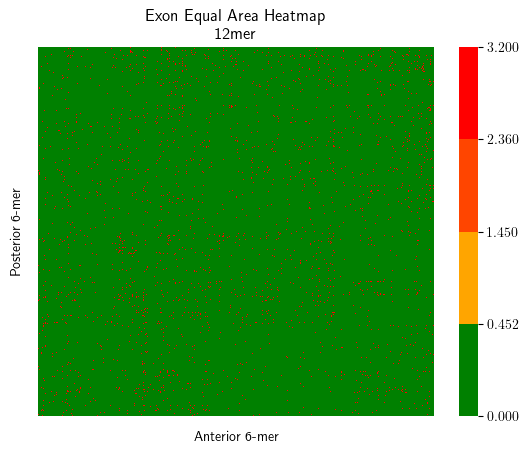

In [22]:
k = 6
colors: list = ['green', 'orange', 'orangered', 'red']
bounds: list = [0, 0.452, 1.45, 2.36, 3.2] # 0.98

heatmap(numpy.log2(fake_exon_frame + 1), colors = colors, bounds = bounds, 
        x_title = f"Anterior {k}-mer", y_title = f"Posterior {k}-mer",
        title = f"Exon Equal Area Heatmap\n{2*k}mer", fileoutput = cwd / "TE_Images_ForPaper" / "Heatmaps" / "EA" / f"PsuedoExon.png")

In [23]:
fake_exon_frame = _unrenormalize(fake_exon_frame, log2=False, s = 12)
fake_exon_frame.to_pickle(cwd / "Dicts_Psuedo" / "Exon_6mer.pkl")
fake_exon_frame.to_pickle(cwd / "Dicts_Psuedo" / "Intron_6mer.pkl")
fake_exon_frame.to_pickle(cwd / "Dicts_Psuedo" / "Inter_6mer.pkl")  # Just doing this so as to avoid having to create data. I'll just make some stuff and then ignore it.

In [24]:
step = 100
max_n = 3
min_n = 0.5
xticks = {0.5: 0.5, 1.0: 1.0, 1.5: 1.5, 2.0: 2.0, 2.5: 2.5, 3.0: 3.0}
ms = [n / step for n in range(int(step*(min_n)), int(step*max_n) + 1)]

fme, _, _, uni, _ = moments_v3(cwd / "Dicts_Psuedo", ms, min_k = 6, N_value = True)

K = 6
		m = 0.5	N = 16777216.0
		m = 0.51	N = 8737708.39987156
		m = 0.52	N = 4666295.220317386
		m = 0.53	N = 2551685.0992082297
		m = 0.54	N = 1426891.7352228423
		m = 0.55	N = 814956.5606571109
		m = 0.56	N = 474860.0484895941
		m = 0.57	N = 281985.8330341041
		m = 0.58	N = 170487.96140090268
		m = 0.59	N = 104849.9103044397
		m = 0.6	N = 65536.00000000009
		m = 0.61	N = 41599.03078782457
		m = 0.62	N = 26795.02272868485
		m = 0.63	N = 17502.07186230314
		m = 0.64	N = 11585.237502960395
		m = 0.65	N = 7766.650997466475
		m = 0.66	N = 5270.1794222466315
		m = 0.67	N = 3617.796446487984
		m = 0.68	N = 2511.1241589963333
		m = 0.69	N = 1761.5243417926727
		m = 0.7	N = 1248.2699819053835
		m = 0.71	N = 893.1860454584129
		m = 0.72	N = 645.0795775461745
		m = 0.73	N = 470.06365576289903
		m = 0.74	N = 345.4737853511545
		m = 0.75	N = 255.9999999999997
		m = 0.76	N = 191.20114709177446
		m = 0.77	N = 143.89086245194235
		m = 0.78	N = 109.07909074285735
		m = 0.79	N = 83.27126499963866
		m

In [26]:
with open(cwd / "Dicts_Moments" / "Exons.pkl", "rb") as file:
    me = pickle.load(file)

with open(cwd / "Dicts_Moments" / "Introns.pkl", "rb") as file:
    mi = pickle.load(file)

In [27]:
me_plots = {"Human": {"data": me, "marker": None}, "Psuedo": {"data": fme, "marker": None}}
mi_plots = {"Human": {"data": mi, "marker": None}, "Psuedo": {"data": None, "marker": None}}
# mn = {"Human": {"data": mn, "marker": None}}
mn_plots = None

Species = Human
plotting for 12-mer
Species = Psuedo
plotting for 12-mer


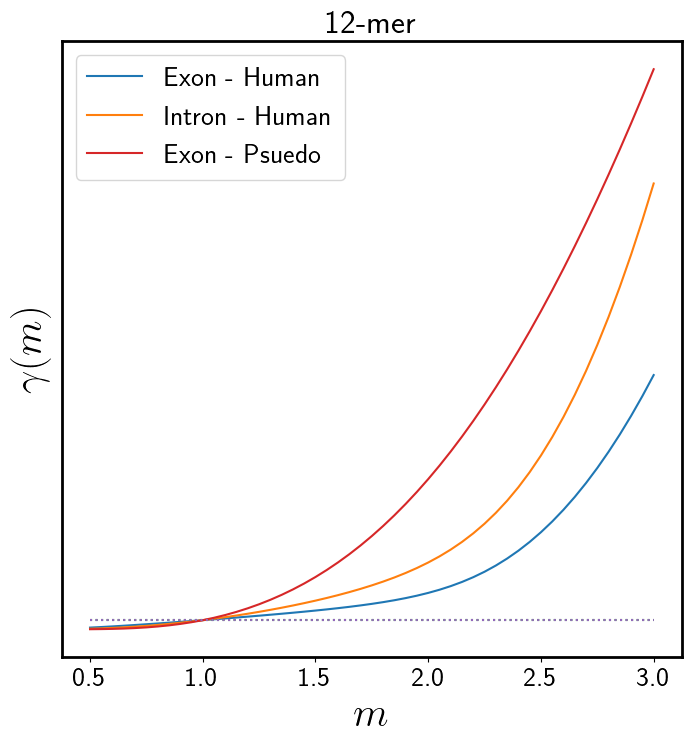

In [28]:
multiple_species_plots(ms, me_plots, mi_plots, mn_plots, uni, cwd / "TE_Images_ForPaper" / "Psuedo", x_ticks = xticks)
